<a href="https://colab.research.google.com/github/Ravindra1972/Anaytics-in-finance-using-Python/blob/main/Derivatives_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
#model parameters
S0 =100   # stock price at time zero
k = 100.0 #  option strike price
T =1.0  # date of maturity in years
r = 0.05 # risk-free short rates
sigma = 0.2  # annual volatility
N = 4 # number of time intervals / no of steps


In [ ]:
# Time parameters
dt = T /N # Length of each tie interval


In [ ]:
R= math.exp(r * dt) # growth factor per interval
df = math.exp(-r*dt) # discount factor per  interest
print(df)

0.9875778004938814


In [ ]:
#Binomial Parameters
u = math.exp(sigma * math.sqrt(dt)) #upward movement
d = 1/u # down movement
p = (R-u)/(u-d)
print(u,d,p)

1.1051709180756477 0.9048374180359595 -0.46219162804358604


In [ ]:
#simulate terminal stock price
for i in reversed(range(N+1)):
  ST=S0*u**i*d**(N-1)
  print(i,ST)

4 110.5170918075648
3 100.00000000000001
2 90.48374180359596
1 81.87307530779817
0 74.08182206817177


In [ ]:
S = np.zeros((N+1,N+1))

In [ ]:
S

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [ ]:
#Simulate stock price
# i:row index
# j: column index
for j in range(N+1):
  for i in range(j+1):
   S[j-i,j]=S0*u**i*d**(j-i)
   print(S[j-i,j])

100.0
90.48374180359595
110.51709180756477
81.87307530779817
100.0
122.14027581601701
74.08182206817177
90.48374180359595
110.51709180756478
134.98588075760034
67.0320046035639
81.87307530779817
100.0
122.14027581601701
149.1824697641271


In [ ]:
#Monte Carlo - Black-Scholes-Merton


In [ ]:
pip install --upgrade pandas numpy pandas_datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 76.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 34.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but 

In [ ]:
pip install pandas_datareader

In [ ]:
pip install yfinance

In [ ]:
pip install scipy

In [ ]:
from scipy.stats import norm


In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import  yfinance as yf


ticker = 'MSFT'
data = pd.DataFrame()
stock_data = yf.download(ticker, start='2000-01-01')


[*********************100%%**********************]  1 of 1 completed


In [ ]:
adj_close_data = stock_data['Adj Close']

In [ ]:
data[ticker] = adj_close_data

In [ ]:
def d1(S, K, r, stdev, T):
    return (np.log(S / K) + (r + stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))

def d2(S, K, r, stdev, T):
    return (np.log(S / K) + (r - stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))

def BSM(S, K, r, stdev, T):
        return (S * norm.cdf(d1(S, K, r, stdev, T))) - (K * np.exp(-r * T) * norm.cdf(d2(S, K, r, stdev, T)))

In [ ]:
log_returns = np.log(1 + data.pct_change())

In [ ]:
log_returns.tail()

,MSFT
Date,
2023-12-04,-0.014443
2023-12-05,0.009115
2023-12-06,-0.010036
2023-12-07,0.005813
2023-12-08,0.008803


In [ ]:
stdev = log_returns.std() * 250 ** 0.5
stdev

MSFT    0.304672
dtype: float64

In [ ]:
r = 0.025
K = 110.0
T = 1

In [ ]:
S = data.iloc[-1]
S

MSFT    374.230011
Name: 2023-12-08 00:00:00, dtype: float64

In [ ]:
d1(S, K, r, stdev, T)

MSFT    4.25311
dtype: float64

In [ ]:
d2(S, K, r, stdev, T)

MSFT    3.948439
dtype: float64

In [ ]:
BSM(S, K, r, stdev, T)

MSFT    266.946195
Name: 2023-12-08 00:00:00, dtype: float64

In [ ]:
#Derivative Pricing in Python
from math import exp, log, pi

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

<ipython-input-1-51839a1f8799>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
def norm_pdf(x):
    return (1.0/((2*pi)**0.5))*exp(-0.5*x*x)

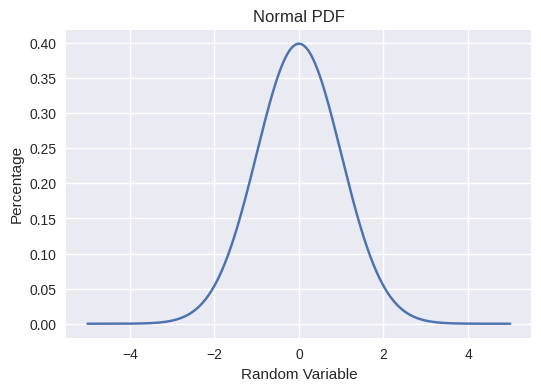

In [ ]:
norm_pdf_dist = []
loop = []
for i in range(0,10000):
    j = i/1000 - 5
    loop.append(j)
    norm_pdf_dist.append(norm_pdf(j))

plt.subplots(figsize=(6,4))
ax = sns.lineplot(x=loop, y=norm_pdf_dist)
ax.set(xlabel="Random Variable", ylabel="Percentage", title="Normal PDF")
plt.show()

In [ ]:
def norm_cdf(x):
    k = 1.0/(1.0+0.2316419*x)
    k_sum = k * (0.319381530 + k * (-0.356563782 + \
        k * (1.781477937 + k * (-1.821255978 + 1.330274429 * k))))

    if x >= 0.0:
        return (1.0 - (1.0 / ((2 * pi)**0.5)) * exp(-0.5 * x * x) * k_sum)
    else:
        return 1.0 - norm_cdf(-x)

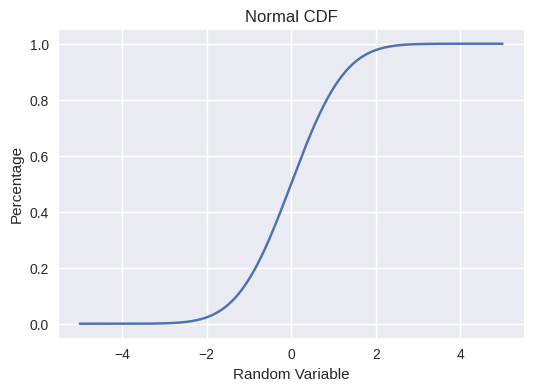

In [ ]:
norm_cdf_dist = []
loop_cdf = []
for i in range(0,10000):
    j = i/1000 - 5
    loop_cdf.append(j)
    norm_cdf_dist.append(norm_cdf(j))

plt.subplots(figsize=(6,4))
ax = sns.lineplot(x=loop, y=norm_cdf_dist)
ax.set(xlabel="Random Variable", ylabel="Percentage", title="Normal CDF")
plt.show()

In [ ]:
def d_j(j, S, K, r, v, T):
    return (log(S/K) + (r + ((-1)**(j-1))*0.5*v*v)*T)/(v*(T**0.5))

In [ ]:
def vanilla_call_price(S, K, r, v, T):
    return S * norm_cdf(d_j(1, S, K, r, v, T)) - \
        K*exp(-r*T) * norm_cdf(d_j(2, S, K, r, v, T))

def vanilla_put_price(S, K, r, v, T):
    return -S * norm_cdf(-d_j(1, S, K, r, v, T)) + \
        K*exp(-r*T) * norm_cdf(-d_j(2, S, K, r, v, T))

In [ ]:
VCP = vanilla_call_price(100, 100, 0.0000001, 0.0000001, 10)
VPP = vanilla_put_price(100, 100, 0.0000001, 0.0000001, 10)

print('Call Price: {}'.format(VCP))
print('Put Price: {}'.format(VPP))

Call Price: 0.00010000667828080623
Put Price: 6.728288662327664e-09


In [ ]:
#Example 2 - Strike Price less than Underlying Value  (S<K)

In [ ]:
VCP = vanilla_call_price(100, 50, 0.0000001, 0.0000001, 10)
VPP = vanilla_put_price(100, 50, 0.0000001, 0.0000001, 10)

print('Call Price: {}'.format(VCP))
print('Put Price: {}'.format(VPP))

Call Price: 50.000049999975
Put Price: 0.0


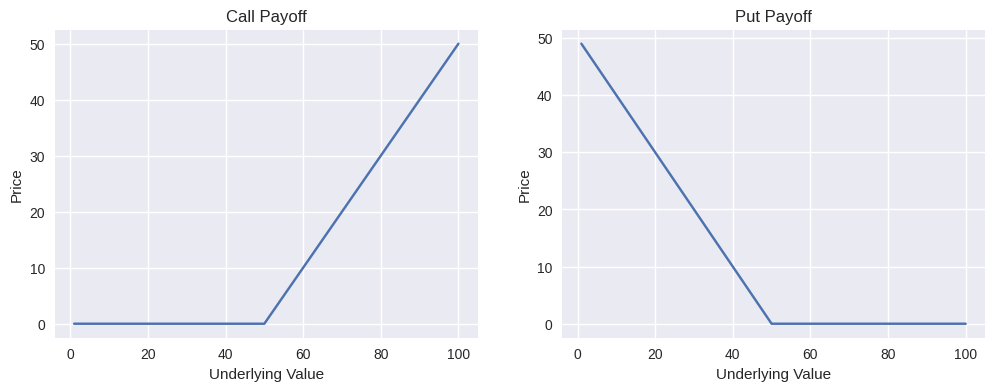

In [ ]:
call_payoff = []
put_payoff = []
loop = []
for i in range(1,101):
    loop.append(i)
    call_payoff.append(vanilla_call_price(i, 50, 0.0000001, 0.0000001, 10))
    put_payoff.append(vanilla_put_price(i, 50, 0.0000001, 0.0000001, 10))

fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.lineplot(x=loop, y=call_payoff, ax=ax[0])
sns.lineplot(x=loop, y=put_payoff, ax=ax[1])
ax[0].set(title="Call Payoff", xlabel="Underlying Value", ylabel="Price")
ax[1].set(title="Put Payoff", xlabel="Underlying Value", ylabel="Price")
plt.show()

<ipython-input-12-bf3e8d7b481e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_call_t = df_call_t.append({'{}%'.format(v):
<ipython-input-12-bf3e8d7b481e>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_put_t = df_put_t.append({'{}%'.format(v):
<ipython-input-12-bf3e8d7b481e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_call_t = df_call_t.append({'{}%'.format(v):
<ipython-input-12-bf3e8d7b481e>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_put_t = df_put_t.append({'{}%'.format(v):
<ipython-input-12-bf3e8d7b481e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

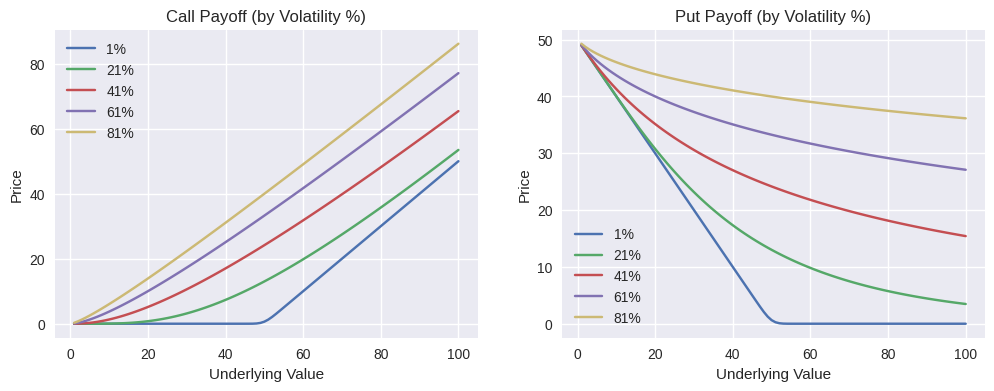

In [ ]:
df_call = pd.DataFrame([])
df_put = pd.DataFrame([])
loop = range(1,101)
for v in range(1,101,20):
    sigma = v/100
    df_call_t = pd.DataFrame({'{}%'.format(v): []})
    df_put_t = pd.DataFrame({'{}%'.format(v): []})

    for i in range(1,101):
        df_call_t = df_call_t.append({'{}%'.format(v):
                                      vanilla_call_price(i, 50, 0.0000001, sigma, 10)},
                                     ignore_index=True)
        df_put_t = df_put_t.append({'{}%'.format(v):
                                    vanilla_put_price(i, 50, 0.0000001, sigma, 10)},
                                   ignore_index=True)

    df_call = pd.concat([df_call, df_call_t], axis=1, sort=False)
    df_put = pd.concat([df_put, df_put_t], axis=1, sort=False)

fig, ax = plt.subplots(1,2,figsize=(12,4))
for i in range(5):
    sns.lineplot(x=loop, y=df_call.iloc[:,i], label=df_call.columns.values[i], ax=ax[0])
    sns.lineplot(x=loop, y=df_put.iloc[:,i], label=df_put.columns.values[i], ax=ax[1])
    ax[0].set(title="Call Payoff (by Volatility %)", xlabel="Underlying Value", ylabel="Price")
    ax[1].set(title="Put Payoff (by Volatility %)", xlabel="Underlying Value", ylabel="Price")
    ax[0].legend()
    ax[1].legend()
plt.show()


In [ ]:
#PRICING DERIVATIVES WITH BINOMIAL TREE MODEL

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#one period binomial model
#Returns a one-period binomial model.

    #Parameters:
    #S (float): initial asset price
    #u (float): factor by which the asset price goes up
    #d (float): factor by which the asset price goes down
    #p (float): probability of an up movement

    #Returns:
    #(tuple): a tuple containing the following elements:
        #- S_0 (float): the initial asset price
       # - S_u (float): the asset price after an up movement
        #- S_d (float): the asset price after a down movement
        #- p (float): the probability of an up movement


def binomial_model(S, u, d, p):
   S_0 = S
   S_u = S * u
   S_d = S * d
   return S_0, S_u, S_d, p

In [ ]:
S_0, S_u, S_d, p = binomial_model(100, 1.1, 0.9, 0.5)
print(f"S_0 = {S_0}, S_u = {S_u}, S_d = {S_d}, p = {p}")

S_0 = 100, S_u = 110.00000000000001, S_d = 90.0, p = 0.5


In [ ]:
import numpy as np
#implementation of a two-period binomial tree in Python
# Define the parameters of the binomial tree
S0 = 100   # Initial stock price
u = 1.1    # Up factor
d = 0.9    # Down factor
r = 0.05   # Risk-free rate
T = 2      # Time to maturity in years
n = 2      # Number of time steps

# Compute the values of the underlying asset at each node of the tree
stock_values = np.zeros((n+1, n+1))
for i in range(n+1):
    for j in range(i+1):
        stock_values[j,i] = S0 * (u**j) * (d**(i-j))

# Compute the risk-neutral probabilities of moving up and down
p = (np.exp(r*T/n) - d) / (u - d)
q = 1 - p

# Compute the option values at each node of the tree
option_values = np.zeros((n+1, n+1))
for i in range(n+1):
    option_values[i,n] = max(stock_values[i,n] - 100, 0)
for i in range(n-1, -1, -1):
    for j in range(i+1):
        option_values[j,i] = np.exp(-r*T/n) * (p*option_values[j,i+1] + q*option_values[j+1,i+1])

# Print the European option value at the initial node of the tree
print("Option value:", option_values[0,0])


Option value: 1.1279845090186384


In [ ]:
import numpy as np
#European Put option value in python
def binomial_tree_put(S, K, r, sigma, T, N):
  dt = T / N
  u = np.exp(sigma * np.sqrt(dt))
  d = 1 / u
  p = (np.exp(r * dt) - d) / (u - d)

    # Generate the stock price tree
  stock_tree = np.zeros((N+1, N+1))
  for i in range(N+1):
      for j in range(i+1):
            stock_tree[j, i] = S * (u ** (i-j)) * (d ** j)

    # Generate the option value tree
  option_tree = np.zeros((N+1, N+1))
  option_tree[:, N] = np.maximum(K - stock_tree[:, N], 0)
  for i in range(N-1, -1, -1):
        for j in range(i+1):
            option_tree[j, i] = np.exp(-r * dt) * (p * option_tree[j, i+1] + (1-p) * option_tree[j+1, i+1])
            option_tree[j, i] = max(option_tree[j, i], K - stock_tree[j, i])

  return option_tree[0, 0]

# Example usage
S = 100  # initial stock price
K = 105  # strike price
r = 0.05  # risk-free interest rate
sigma = 0.2  # stock price volatility
T = 1  # time to maturity (in years)
N = 2  # number of time steps in the binomial tree

put_price = binomial_tree_put(S, K, r, sigma, T, N)
print("Put price:", put_price)


Put price: 9.088257638650122


In [ ]:
#two-step binomial tree for an American put option with the same exercise parameters as the European put option example I provided earlier

In [ ]:
import numpy as np

def binomial_tree_american_put(S, K, r, sigma, T, N):
  dt = T / N
  u = np.exp(sigma * np.sqrt(dt))
  d = 1 / u
  p = (np.exp(r * dt) - d) / (u - d)

    # Generate the stock price tree
  stock_tree = np.zeros((N+1, N+1))
  for i in range(N+1):
        for j in range(i+1):
            stock_tree[j, i] = S * (u ** (i-j)) * (d ** j)

    # Generate the option value tree
  option_tree = np.zeros((N+1, N+1))
  option_tree[:, N] = np.maximum(K - stock_tree[:, N], 0)
  for i in range(N-1, -1, -1):
        for j in range(i+1):
            exercise_value = K - stock_tree[j, i]
            hold_value = np.exp(-r * dt) * (p * option_tree[j, i+1] + (1-p) * option_tree[j+1, i+1])
            option_tree[j, i] = max(exercise_value, hold_value)

  return option_tree[0, 0]

# Example usage
S = 100  # initial stock price
K = 105  # strike price
r = 0.05  # risk-free interest rate
sigma = 0.2  # stock price volatility
T = 1  # time to maturity (in years)
N = 2  # number of time steps in the binomial tree

put_price = binomial_tree_american_put(S, K, r, sigma, T, N)
print("Put price:", put_price)

Put price: 9.088257638650122


In [ ]:
#delta hedge for a European call option in Python

In [ ]:
import numpy as np
from scipy.stats import norm

def black_scholes_call(S, K, r, sigma, T):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

def delta(S, K, r, sigma, T):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1)

def delta_hedge_call(S, K, r, sigma, T, N):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    # Generate the stock price tree
    stock_tree = np.zeros((N+1, N+1))
    for i in range(N+1):
        for j in range(i+1):
            stock_tree[j, i] = S * (u ** (i-j)) * (d ** j)

    # Generate the option value tree
    option_tree = np.zeros((N+1, N+1))
    for j in range(N+1):
        option_tree[j, N] = max(stock_tree[j, N] - K, 0)
    for i in range(N-1, -1, -1):
        for j in range(i+1):
            option_tree[j, i] = np.exp(-r * dt) * (p * option_tree[j, i+1] + (1-p) * option_tree[j+1, i+1])

    # Simulate the delta hedge
    hedge = []
    stock_position = delta(S, K, r, sigma, T)
    option_price = option_tree[0, 0]
    hedge.append(-option_price)
    for i in range(1, N+1):
        stock_price = stock_tree[0, i]

In [ ]:
import numpy as np

# Define the input values
S0 = 100      # Initial stock price
u = 1.3499    # Up factor
d = 0.7408    # Down factor
a = 1.0513    # N/A
p = 0.5097    # Probability of up move

# Define the number of time steps and initialize the stock price tree
n = 3
stock_tree = np.zeros((n+1, n+1))
stock_tree[0, 0] = S0

# Fill in the stock price tree
for i in range(1, n+1):
    for j in range(i+1):
        stock_tree[j, i] = S0 * u**(i-j) * d**j

# Print the stock price tree
print("Stock price tree:")
print(stock_tree)

# Initialize the option price tree
option_tree = np.zeros((n+1, n+1))

# Fill in the option price tree at the final nodes
for j in range(n+1):
    option_tree[j, n] = max(stock_tree[j, n] - 100, 0)

# Work backwards through the tree to calculate the option prices at each node
for i in range(n-1, -1, -1):
    for j in range(i+1):
        option_tree[j, i] = np.exp(-0.06 * 1/3) * (p * option_tree[j, i+1] + (1-p) * option_tree[j+1, i+1])

# Print the option price tree
print("Option price tree:")
print(option_tree)

Stock price tree:
[[100.         134.99       182.223001   245.98282905]
 [  0.          74.08       100.000592   134.99079914]
 [  0.           0.          54.878464    74.08043855]
 [  0.           0.           0.          40.65396613]]
Option price tree:
[[ 30.79729065  53.24146579  89.75035926 145.98282905]
 [  0.           8.73396303  17.48165742  34.99079914]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]]


In [ ]:
import numpy as np
from scipy.stats import norm
N = norm.cdf

def BS_CALL(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * N(d1) - K * np.exp(-r*T)* N(d2)

def BS_PUT(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return K*np.exp(-r*T)*N(-d2) - S*N(-d1)

[0.8598698540453489, 0.8710568968385157, 0.8823498534935954, 0.8937492601230739, 0.9052556513791474, 0.9168695604239554, 0.9285915188999194, 0.9404220569003856, 0.9523617029404017, 0.9644109839277633, 0.9765704251341951, 0.988840550166822, 1.0012218809397524, 1.0137149376460055, 1.0263202387295491, 1.0390383008576283, 1.0518696388932653, 1.0648147658680216, 1.0778741929549582, 1.0910484294418508, 1.10433798270462, 1.1177433581809924, 1.1312650593444467, 1.1449035876782183, 1.1586594426498564, 1.1725331216856913, 1.1865251201457738, 1.2006359312988977, 1.2148660462980345, 1.2292159541558476, 1.243686141720528, 1.2582770936519294, 1.2729892923978472, 1.2878232181706366, 1.3027793489240107, 1.317858160330175, 1.3330601257571288, 1.3483857162463089, 1.3638354004903785, 1.3794096448114033, 1.395108913139234, 1.4109336669900276, 1.426884365445309, 1.4429614651309652, 1.459165420196765, 1.4754966822960078, 1.4919557005654518, 1.5085429216055353, 1.5252587894608531, 1.5421037456008655, 1.55907

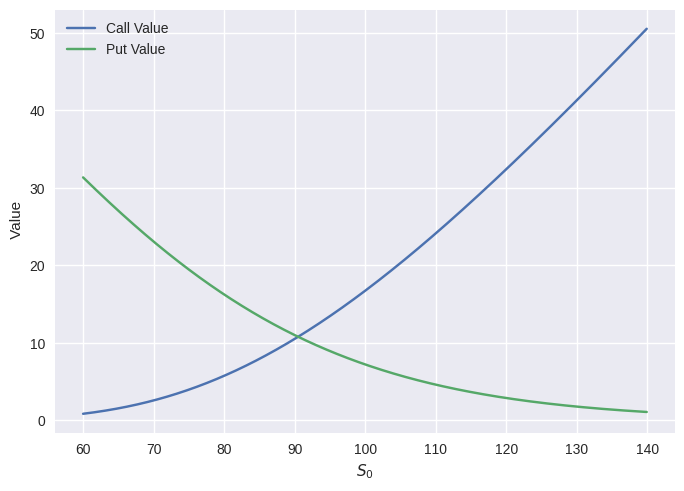

In [ ]:
K = 100
r = 0.1
T = 1
sigma = 0.3

S = np.arange(60,140,0.1)

calls = [BS_CALL(s, K, T, r, sigma) for s in S]
print(calls)
puts = [BS_PUT(s, K, T, r, sigma) for s in S]
print(puts)
plt.plot(S, calls, label='Call Value')
plt.plot(S, puts, label='Put Value')
plt.xlabel('$S_0$')
plt.ylabel(' Value')
plt.legend()

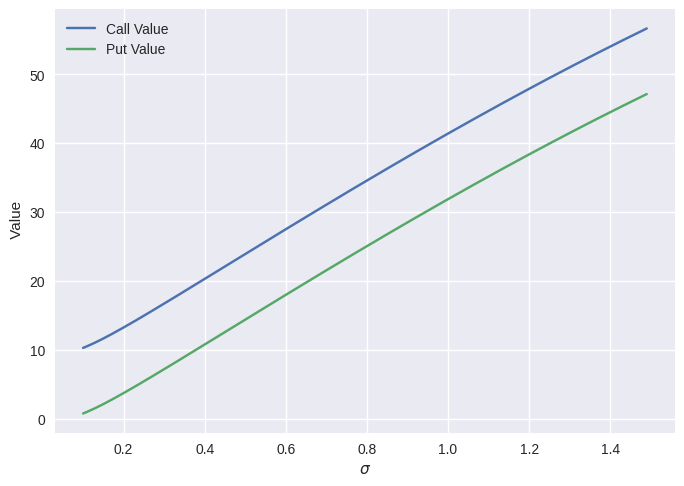

In [ ]:
# σ(volatility) Effect on Black-Scholes Value
K = 100
r = 0.1
T = 1
Sigmas = np.arange(0.1, 1.5, 0.01)
S = 100

calls = [BS_CALL(S, K, T, r, sig) for sig in Sigmas]
puts = [BS_PUT(S, K, T, r, sig) for sig in Sigmas]
plt.plot(Sigmas, calls, label='Call Value')
plt.plot(Sigmas, puts, label='Put Value')
plt.xlabel('$\sigma$')
plt.ylabel(' Value')
plt.legend()


<ipython-input-56-d1f90279811f>:6: RuntimeWarning: invalid value encountered in double_scalars
  d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
<ipython-input-56-d1f90279811f>:11: RuntimeWarning: invalid value encountered in double_scalars
  d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))


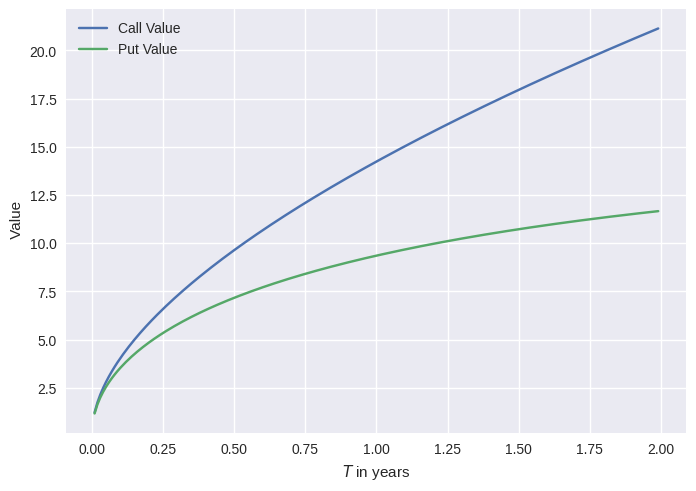

In [ ]:
#Effect of Time on Black-Scholes Price
K = 100
r = 0.05
T = np.arange(0, 2, 0.01)
sigma = 0.3
S = 100

calls = [BS_CALL(S, K, t, r, sigma) for t in T]
puts = [BS_PUT(S, K, t, r, sigma) for t in T]
plt.plot(T, calls, label='Call Value')
plt.plot(T, puts, label='Put Value')
plt.xlabel('$T$ in years')
plt.ylabel(' Value')
plt.legend()

[*********************100%%**********************]  1 of 1 completed


Text(0.5, 1.0, 'AAPL Rolling Volatility')

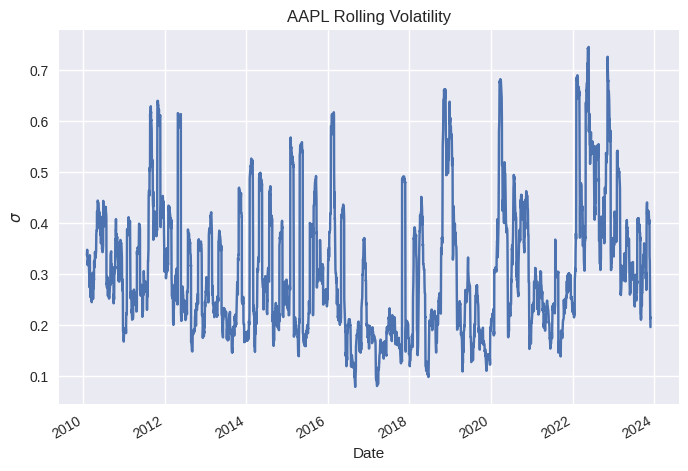

In [ ]:
#Main Problem with Black Scholes

import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

start = dt.datetime(2010,1,1)
end =dt.datetime(2023,12,1)
symbol = 'AAPL' ###using Apple as an example
source = 'yahoo'
ticker = "AMZN"
data = yf.download(ticker, start, end)

data['change'] = data['Adj Close'].pct_change()
data['rolling_sigma'] = data['change'].rolling(20).std() * np.sqrt(255)


data.rolling_sigma.plot()
plt.ylabel('$\sigma$')
plt.title('AAPL Rolling Volatility')

In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt
#Binomial Lattice (European Call option)
var = 0.2 # Variance
sigma = np.sqrt(var) # Standard deviation
S = 44 # Stock price
K = 45 # Strike price
T = 2/12 # Time period (two months = two steps)
r = 0.06 # Risk-free interest rate
delta_t = 1/12 # time-steps of one month
R = np.exp(r * delta_t) # Discounted interest

u = np.exp(sigma*np.sqrt(delta_t)) # Up scenario
d = np.exp(-sigma*np.sqrt(delta_t)) # Down scenario

def price_binomial(R, Pu, Pd, u, d):
    """ Compute option price for a step """
    q = (R-d)/(u-d)
    return (1/R) * (q * Pu + (1-q)*Pd)

In [3]:
#Two-step call option price
c_ud = np.maximum(0, u * d * S - K)
c_uu = np.maximum(0, u**2 * S - K)
c_dd = np.maximum(0, d**2 * S - K)

In [4]:
Cu = price_binomial(R, c_uu, c_ud, u, d)
print(f"Option price for 1-step up scenario: {Cu.round(2)}")

Option price for 1-step up scenario: 5.8


In [5]:
Cd = price_binomial(R, c_ud, c_dd, u, d)
print(f"Option price for 1-step down scenario: {Cd.round(2)}")

Option price for 1-step down scenario: 0.0


In [6]:
C = price_binomial(R, Cu, Cd, u, d)
print(f"Fair option price given all scenario's: {C.round(2)}")

Fair option price given all scenario's: 2.81


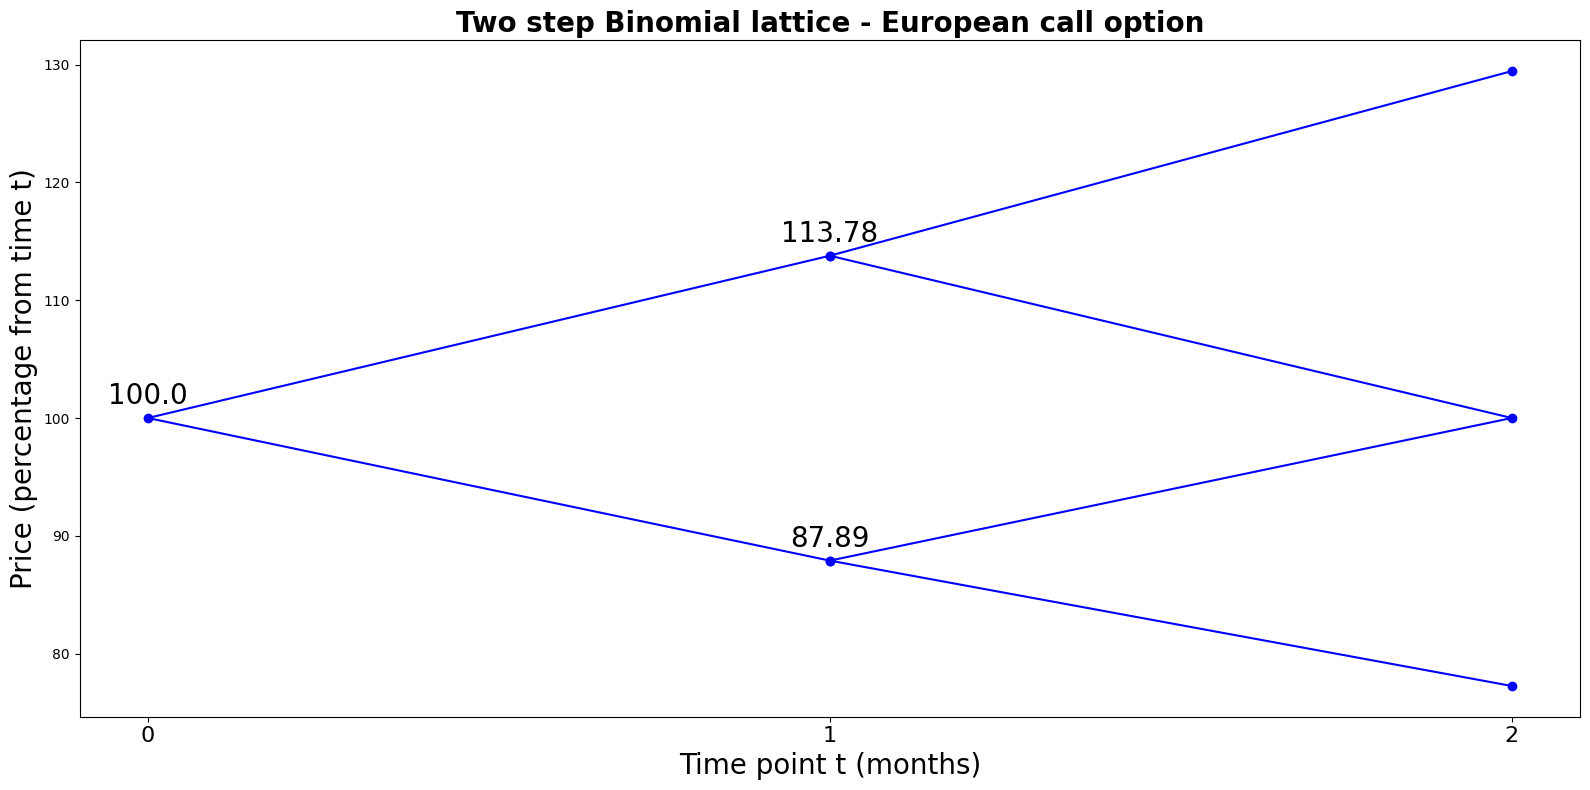

In [9]:
fig = plt.figure(figsize=[16, 8])
for i in range(2):
    x = [1, 0, 1]
    for j in range(i):
        x.append(0)
        x.append(1)
    x = np.array(x) + i
    y = np.arange(-(i+1), i+2)[::-1]
    y = 100 * np.power(u, y)
    plt.plot(x, y, 'bo-')
    if i % 2 == 0:
        for x_pos, y_value in zip(x,y):
            plt.annotate(y_value.round(2),
                         (x_pos, y_value),
                         textcoords="offset points",
                         xytext=(0, 10),
                         ha='center', fontsize=20)
plt.xlabel('Time point t (months)', fontsize=20)
plt.ylabel('Price (percentage from time t)', fontsize=20)
plt.xticks([0, 1, 2], fontsize=16)
plt.title('Two step Binomial lattice - European call option', fontsize=20, weight='bold')
plt.tight_layout()

In [14]:
#Black-Scholes
import math
class BlackScholes:
    """
    Class to calculate (European) call and put option prices through the Black-Scholes formula
    without dividends

    :param S: Price of underlying stock
    :param K: Strike price
    :param T: Time till expiration (in years)
    :param r: Risk-free interest rate (0.05 indicates 5%)
    :param sigma: Volatility (standard deviation) of stock (0.15 indicates 15%)
    """
    @staticmethod
    def _d1(S, K, T, r, sigma):
        return (1 / (sigma * np.sqrt(T))) * (np.log(S/K) + (r + sigma**2 / 2) * T)

    def _d2(self, S, K, T, r, sigma):
        return self._d1(S, K, T, r, sigma) - sigma * np.sqrt(T)

    def call_price(self, S, K, T, r, sigma):
        """ Main method for calculating price of a call option """
        d1 = self._d1(S, K, T, r, sigma)
        d2 = self._d2(S, K, T, r, sigma)
        return norm.cdf(d1) * S - norm.cdf(d2) * K * np.exp(-r*T)

    def put_price(self, S, K, T, r, sigma):
        """ Main method for calculating price of a put option """
        d1 = self._d1(S, K, T, r, sigma)
        d2 = self._d2(S, K, T, r, sigma)
        return norm.cdf(-d2) * K * np.exp(-r*T) - norm.cdf(-d1) * S

    def call_in_the_money(self, S, K, T, r, sigma):
        """
        Calculate probability that call option will be in the money at
        maturity according to Black-Scholes.
        """
        d2 = self._d2(S, K, T, r, sigma)
        return norm.cdf(d2)

    def put_in_the_money(self, S, K, T, r, sigma):
        """
        Calculate probability that put option will be in the money at
        maturity according to Black-Scholes.
        """
        d2 = self._d2(S, K, T, r, sigma)
        return 1 - norm.cdf(d2)

In [30]:
pip install scipy

In [15]:
S = 44 # Stock price
K = 45 # Strike price
T = 2/12 # Time till expiration (in years)
r = 0.06 # Risk-free interest rate
sigma = np.sqrt(0.2) # Volatility (standard deviation)

In [31]:
BlackScholes().call_price(S, K, T, r, sigma)


2.9518170207100383

In [32]:
from scipy.stats import norm

In [37]:
import math
from scipy.stats import norm
S = 44 # Stock price
K = 45 # Strike price
T = 2/12 # Time till expiration (in years)
r = 0.06 # Risk-free interest rate
sigma = np.sqrt(0.2) # Volatility (standard deviation)
def black_scholes(S, K, T, r, sigma, option_type):
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    if option_type == "call":
        return S * math.norm.cdf(d1) - K * math.exp(-r * T) * math.norm.cdf(d2)
    else:  # option_type == "put"
        return price = K * math.exp(-r * T) * math.norm.cdf(-d2) - S * math.norm.cdf(-d1)


SyntaxError: ignored

In [34]:
print("Option price:",black_scholes(r,S,K,T,sigma,"c"))

AttributeError: ignored